<img align="right" width="200" height="200" src="https://static.wikia.nocookie.net/lego/images/2/23/PPG_logo.png"> 

# <span style="color:#EF7C8E">Scientific Visualization - Handling NA's Assignment - Python </span>
 


## <span style="color:#55BB99"> By: Wejdan Al-Ahmadi</span>
<hr style="border:2px solid gray"> </hr>

## <span style="color:#726060"> Objective:</span>

### <span style="color:#726060"> Download the dataset below about burrito reviews in California and complete the following tasks.</span>

* Create a histogram or bar chart of what the distribution of values looks like before handling **NaN** values and after. Each plot must have the following
    * Axis Labels
    * Title
* Determine how many missing values are present in each column
* Determine the total amount of missing values
* Choose a column and replace **NaN** values with the mean
* Choose a column and replace **NaN** values with the median
* Choose a column and replace **NaN** values with the mode
* Choose a column and replace **NaN** values with your own value
* Choose a column and use backwards filling
* Choose a column and use forwards filling


Download the data for the assignment [here](https://drive.google.com/file/d/1TjvAtdw2mz5zKDYJMBUFHqjOhey8u95q/view)

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
burrito_df = pd.read_csv('./data/burritos.csv')
burrito_df.head()

,Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,...,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini
0,Donato's taco shop,California,1/18/2016,Miramar,6780 Miramar Rd,http://donatostacoshop.net/,3.5,4.2,NaN,6.49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Oscar's Mexican food,California,1/24/2016,San Marcos,225 S Rancho Santa Fe Rd,http://www.yelp.com/biz/oscars-mexican-food-sa...,3.5,3.3,NaN,5.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Oscar's Mexican food,Carnitas,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,4.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oscar's Mexican food,Carne asada,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,5.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pollos Maria,California,1/27/2016,Carlsbad,3055 Harding St,http://pollosmaria.com/,4.0,3.8,x,6.59,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### <span style="color:#EF7C8E">1) Exploring and Cleaning the data:</span>
In the following cells I explore the data to look for missing values, or values that could be percieved as missing but is not interpreted by pandas. 

In [3]:
burrito_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 66 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Location        423 non-null    object 
 1   Burrito         423 non-null    object 
 2   Date            423 non-null    object 
 3   Neighborhood    92 non-null     object 
 4   Address         88 non-null     object 
 5   URL             87 non-null     object 
 6   Yelp            87 non-null     float64
 7   Google          87 non-null     float64
 8   Chips           26 non-null     object 
 9   Cost            416 non-null    float64
 10  Hunger          420 non-null    float64
 11  Mass (g)        22 non-null     float64
 12  Density (g/mL)  22 non-null     float64
 13  Length          284 non-null    float64
 14  Circum          282 non-null    float64
 15  Volume          282 non-null    float64
 16  Tortilla        423 non-null    float64
 17  Temp            403 non-null    flo

In [4]:
# We can see from the info there is a lot of missing values, to further investigate I write the following code: 
print(burrito_df.isnull().sum().to_string())
# We can see we have an overwhelmingly large amount of missing values

Location            0
Burrito             0
Date                0
Neighborhood      331
Address           335
URL               336
Yelp              336
Google            336
Chips             397
Cost                7
Hunger              3
Mass (g)          401
Density (g/mL)    401
Length            139
Circum            141
Volume            141
Tortilla            0
Temp               20
Meat               14
Fillings            3
Meat:filling        9
Uniformity          2
Salsa              25
Synergy             2
Wrap                3
overall             2
Rec               190
Reviewer            1
Notes             277
Unreliable        390
NonSD             416
Beef              243
Pico              264
Guac              268
Cheese            263
Fries             295
Sour cream        331
Pork              372
Chicken           402
Shrimp            402
Fish              417
Rice              387
Beans             388
Lettuce           412
Tomato            416
Bell peper

In [5]:
# This line of code is to force python to display the full dataframe with all the columns and rows so I can get
# a better look at the data, I notice that a lot of columns have 'x' and 'X', I assume this is to indicate missing values
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    display(burrito_df.head(7))

,Location,Burrito,Date,Neighborhood,Address,URL,Yelp,Google,Chips,Cost,Hunger,Mass (g),Density (g/mL),Length,Circum,Volume,Tortilla,Temp,Meat,Fillings,Meat:filling,Uniformity,Salsa,Synergy,Wrap,overall,Rec,Reviewer,Notes,Unreliable,NonSD,Beef,Pico,Guac,Cheese,Fries,Sour cream,Pork,Chicken,Shrimp,Fish,Rice,Beans,Lettuce,Tomato,Bell peper,Carrots,Cabbage,Sauce,Salsa.1,Cilantro,Onion,Taquito,Pineapple,Ham,Chile relleno,Nopales,Lobster,Queso,Egg,Mushroom,Bacon,Sushi,Avocado,Corn,Zucchini
0,Donato's taco shop,California,1/18/2016,Miramar,6780 Miramar Rd,http://donatostacoshop.net/,3.5,4.2,NaN,6.49,3.0,NaN,NaN,NaN,NaN,NaN,3.0,5.0,3.0,3.5,4.0,4.0,4.0,4.0,4.0,3.80,NaN,Scott,good fries: 4/5,NaN,NaN,x,x,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Oscar's Mexican food,California,1/24/2016,San Marcos,225 S Rancho Santa Fe Rd,http://www.yelp.com/biz/oscars-mexican-food-sa...,3.5,3.3,NaN,5.45,3.5,NaN,NaN,NaN,NaN,NaN,2.0,3.5,2.5,2.5,2.0,4.0,3.5,2.5,5.0,3.00,NaN,Scott,Fries: 3/5; too little meat,NaN,NaN,x,x,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Oscar's Mexican food,Carnitas,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,4.85,1.5,NaN,NaN,NaN,NaN,NaN,3.0,2.0,2.5,3.0,4.5,4.0,3.0,3.0,5.0,3.00,NaN,Emily,NaN,NaN,NaN,NaN,x,x,NaN,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oscar's Mexican food,Carne asada,1/24/2016,NaN,NaN,NaN,NaN,NaN,NaN,5.25,2.0,NaN,NaN,NaN,NaN,NaN,3.0,2.0,3.5,3.0,4.0,5.0,4.0,4.0,5.0,3.75,NaN,Ricardo,Go to average burrito place like Rigoberto's i...,NaN,NaN,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Pollos Maria,California,1/27/2016,Carlsbad,3055 Harding St,http://pollosmaria.com/,4.0,3.8,x,6.59,4.0,NaN,NaN,NaN,NaN,NaN,4.0,5.0,4.0,3.5,4.5,5.0,2.5,4.5,4.0,4.20,NaN,Scott,NaN,NaN,NaN,x,x,NaN,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Pollos Maria,combo chicken,1/28/2016,NaN,NaN,NaN,NaN,NaN,NaN,6.99,4.0,NaN,NaN,NaN,NaN,NaN,3.0,4.0,5.0,3.5,2.5,2.5,2.5,4.0,1.0,3.20,NaN,Emily,NaN,NaN,NaN,NaN,NaN,x,x,NaN,x,NaN,x,NaN,NaN,x,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Nico's Taco Shop,California,1/30/2016,Carmel Valley,3860 Valley Centre Dr #404,http://www.yelp.com/biz/nicos-taco-shop-san-diego,3.0,2.9,NaN,7.19,1.5,NaN,NaN,NaN,NaN,NaN,2.0,3.0,3.0,2.0,2.5,2.5,NaN,2.0,3.0,2.60,NaN,Scott,not fries. big potatoes,NaN,NaN,x,NaN,NaN,x,x,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# and just to make sure I printed the value counts for all 66 columns, this supports my claim that only 'X' and 'x' are the issue
for column_name in burrito_df.columns: 
    print(burrito_df[column_name].value_counts().to_string())

Lucha Libre North Park                                 28
Taco Villa                                             28
Rigoberto's Taco Shop                                  25
California Burritos                                    23
Taco Stand                                             13
Los Primos Mexican Food                                12
Los Tacos                                              12
Taco stand                                             12
El Zarape                                              10
Valentines Mexican Food                                 9
Valentine's Mexican Food                                9
Vallarta express                                        9
Tony's Fresh Mexican Food                               9
Lupe's Taco Shop                                        6
California burritos                                     6
Cancun Mexican & Seafood                                6
California Burrito Company                              5
Lolita's taco 

In [7]:
# I replace the 'x' and 'X' with a NaN and this concludes cleaning up the data
burrito_df=burrito_df.replace({'x':np.nan, 'X':np.nan})

### <span style="color:#EF7C8E">2) Objectives:</span>
#### <span style="color:#55BB99">1) Histogram:</span>
Create a histogram or bar chart of what the distribution of values looks like before handling NaN values and after.

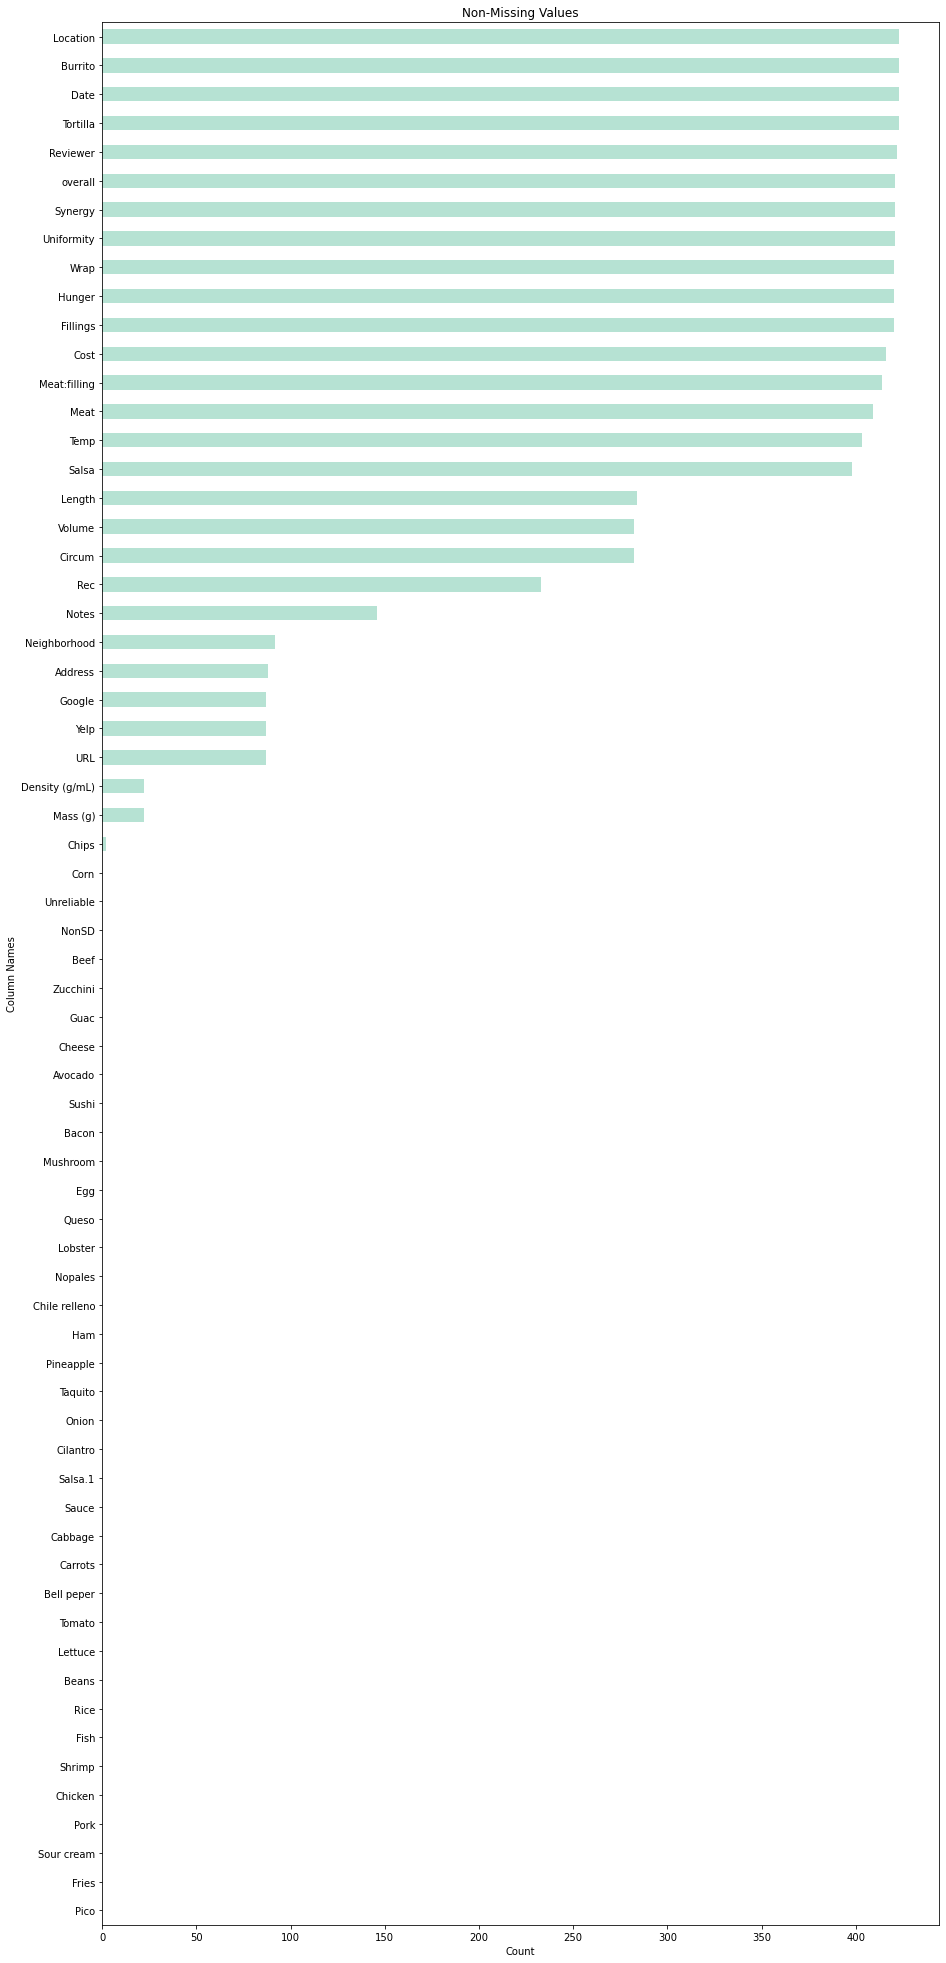

In [8]:
plt.figure(figsize=(15,35))
burrito_df.notnull().sum().sort_values().plot(kind="barh",title="Non-Missing Values", color="#B6E2D3")
plt.ylabel("Column Names")
plt.xlabel("Count");

#### <span style="color:#55BB99">2) Number of missing values of each column:</span>
From the code block below I have printed out the missing values of each column: 

In [9]:
burrito_df.isnull().sum().to_string()

'Location            0\nBurrito             0\nDate                0\nNeighborhood      331\nAddress           335\nURL               336\nYelp              336\nGoogle            336\nChips             421\nCost                7\nHunger              3\nMass (g)          401\nDensity (g/mL)    401\nLength            139\nCircum            141\nVolume            141\nTortilla            0\nTemp               20\nMeat               14\nFillings            3\nMeat:filling        9\nUniformity          2\nSalsa              25\nSynergy             2\nWrap                3\noverall             2\nRec               190\nReviewer            1\nNotes             277\nUnreliable        423\nNonSD             423\nBeef              423\nPico              423\nGuac              423\nCheese            423\nFries             423\nSour cream        423\nPork              423\nChicken           423\nShrimp            423\nFish              423\nRice              423\nBeans             423\nLettuce   

#### <span style="color:#55BB99">3) Number of total missing values:</span>
This code block below sums the total missing values which is 19,527 values. 

In [10]:
#the total number of missing values is 19527
burrito_df.isnull().sum().sum()

19527

#### <span style="color:#55BB99">4) Handling NaNs:</span>
- I first drop all the columns with 100% NaN values. 
- I decided to drop any column with missing values more than 77%. 

In [11]:
burrito=burrito_df.dropna(axis = 'columns', how = 'all') # drop columns with 100% NaN

missing_data = burrito.isnull().sum()     # get a series of the columns that have NaN
columns_to_drop = []                      # define list of column names to drop
for index,value in missing_data.items():  # loop through the series
    percentage = value/423                # calculate the percentage by dividing number of NaN values over the total record values
    if(percentage>0.77):                  # check if the percentage exceeds 77%
        columns_to_drop.append(index)     # add to the list
burrito=burrito.drop(columns=columns_to_drop) # drop all columns with NaN % more than 77%

#### <span style="color:#55BB99">5) Handling NaNs: replace with mean </span>


In [12]:
burrito_clean = burrito

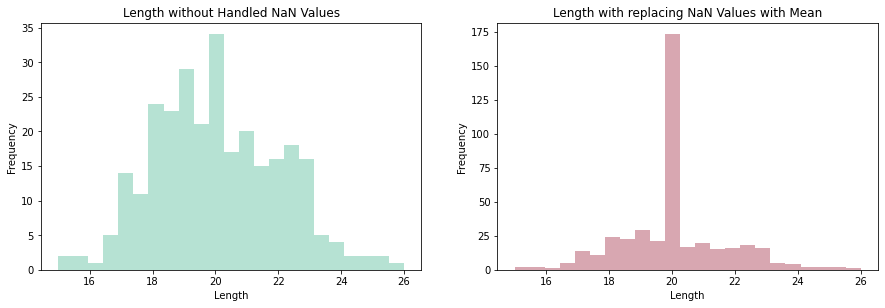

In [13]:

plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1) 
burrito["Length"].plot(kind="hist", bins=23, color="#B6E2D3",title="Length without Handled NaN Values")
plt.xlabel("Length");

length_mean = round(burrito_clean['Length'].mean())
burrito_clean["Length"]=burrito_clean["Length"].fillna(length_mean)

plt.subplot(2, 2, 2) 
burrito_clean["Length"].plot(kind="hist", bins=23, color="#D8A7B1", title="Length with replacing NaN Values with Mean")
plt.xlabel("Length");

#### <span style="color:#55BB99">6) Handling NaNs: replace with Median </span>


Text(0.5, 0, 'Circum')

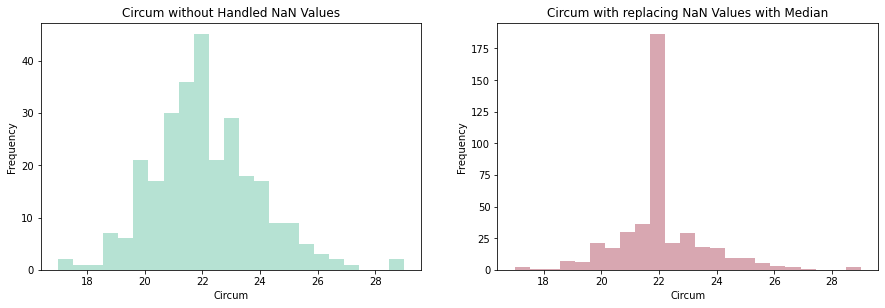

In [14]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1) 
burrito["Circum"].plot(kind="hist", bins=23, color="#B6E2D3",title="Circum without Handled NaN Values")
plt.xlabel("Circum");

circum_median = round(burrito['Circum'].median())
burrito_clean["Circum"]=burrito_clean["Circum"].fillna(circum_median)

plt.subplot(2, 2, 2) 
burrito_clean["Circum"].plot(kind="hist", bins=23, color="#D8A7B1", title="Circum with replacing NaN Values with Median")
plt.xlabel("Circum")


#### <span style="color:#55BB99">7) Handling NaNs: replace with Mode </span>


C:\Users\wejda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\wejda\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Reviewer with replacing NaN Values with Mode')

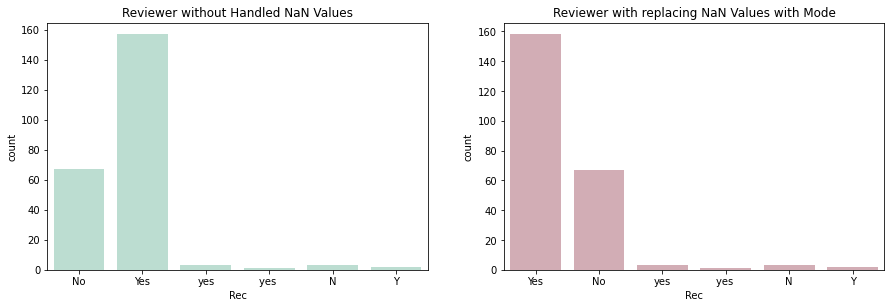

In [15]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1) 
sns.countplot(burrito["Rec"], color="#B6E2D3")
plt.title("Reviewer without Handled NaN Values")

rec_mode = burrito_clean['Rec'].mode()
burrito_clean["Rec"]=burrito_clean["Rec"].fillna(rec_mode)

plt.subplot(2, 2, 2) 
sns.countplot(burrito_clean["Rec"],color="#D8A7B1")
plt.title("Reviewer with replacing NaN Values with Mode")

#### <span style="color:#55BB99">8) Handling NaNs: replace with my own value </span>


Text(0.5, 1.0, 'Reviewer with replacing NaN Values with own value')

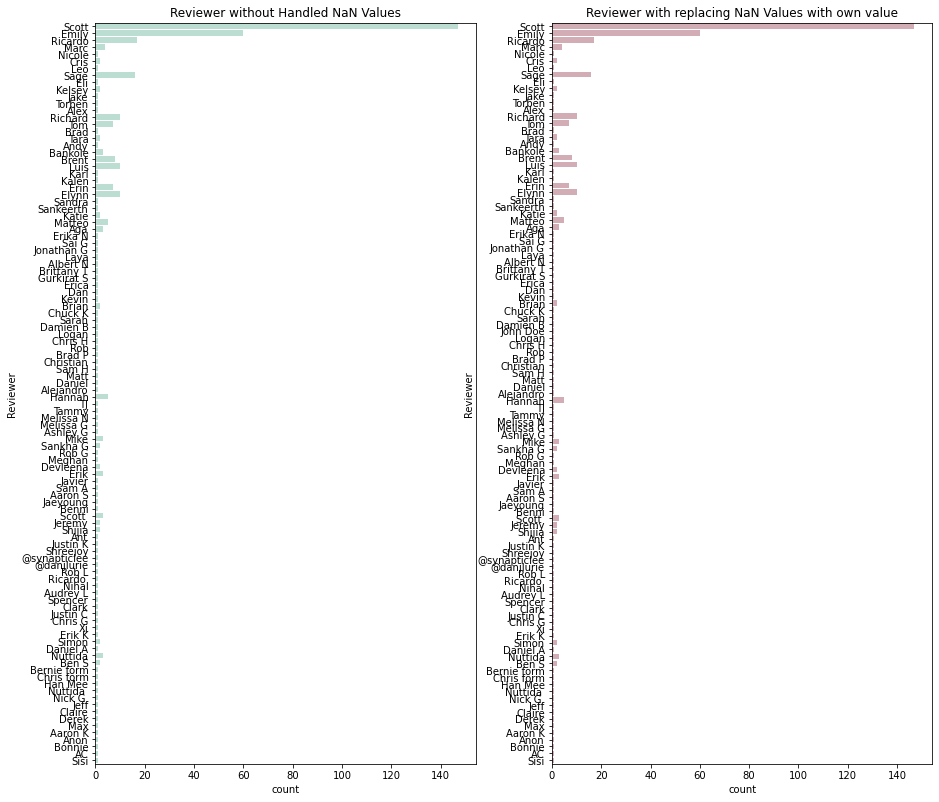

In [16]:
plt.figure(figsize=(15,30))
plt.subplot(2, 2, 1) 
sns.countplot(y=burrito["Reviewer"], color="#B6E2D3")
plt.title("Reviewer without Handled NaN Values")

anonymous_reviewer = 'John Doe'
burrito_clean['Reviewer']=burrito_clean['Reviewer'].fillna(anonymous_reviewer)

plt.subplot(2, 2, 2) 
sns.countplot(y=burrito_clean["Reviewer"] ,color="#D8A7B1")
plt.title("Reviewer with replacing NaN Values with own value")

#### <span style="color:#55BB99">9) Handling NaNs: replace with Forward Filling </span>


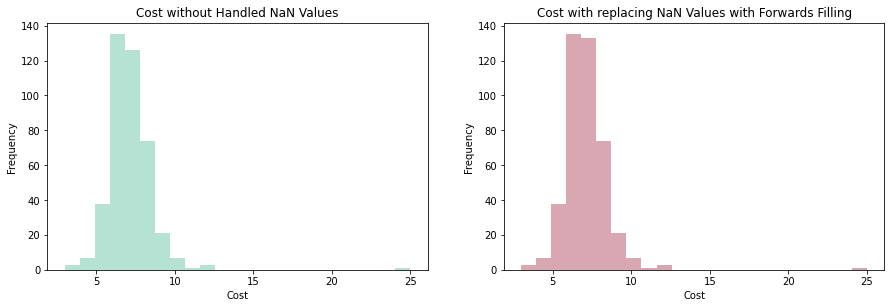

In [17]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1) 
burrito["Cost"].plot(kind="hist", bins=23, color="#B6E2D3",title="Cost without Handled NaN Values")
plt.xlabel("Cost");

burrito_clean["Cost"]=burrito_clean["Cost"].fillna(method="ffill")

plt.subplot(2, 2, 2) 
burrito_clean["Cost"].plot(kind="hist", bins=23, color="#D8A7B1", title="Cost with replacing NaN Values with Forwards Filling")
plt.xlabel("Cost");


#### <span style="color:#55BB99">10) Handling NaNs: replace with Backward Filling </span>


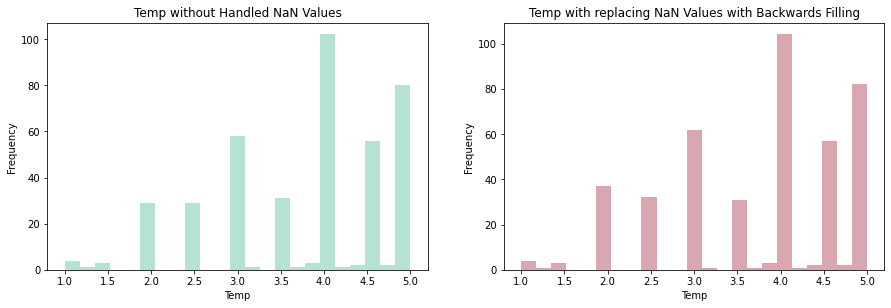

In [18]:
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1) 
burrito["Temp"].plot(kind="hist", bins=23,color="#B6E2D3", title="Temp without Handled NaN Values")
plt.xlabel("Temp");

burrito_clean["Temp"]=burrito_clean["Temp"].fillna(method="bfill")

plt.subplot(2, 2, 2) 
burrito_clean["Temp"].plot(kind="hist", bins=23,color="#D8A7B1", title="Temp with replacing NaN Values with Backwards Filling")
plt.xlabel("Temp");



#### <span style="color:#55BB99">11) Histogram: Data after replacing NaN </span>


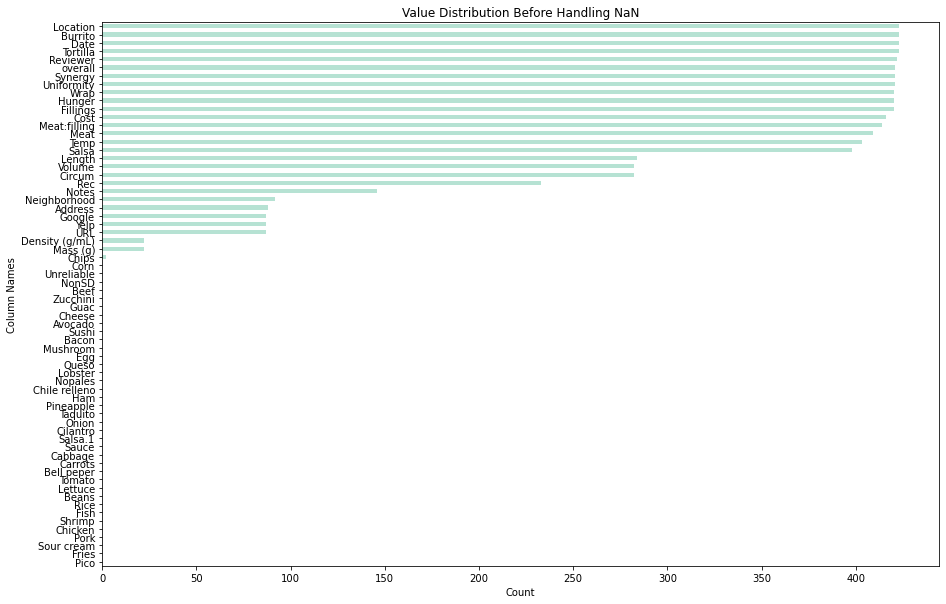

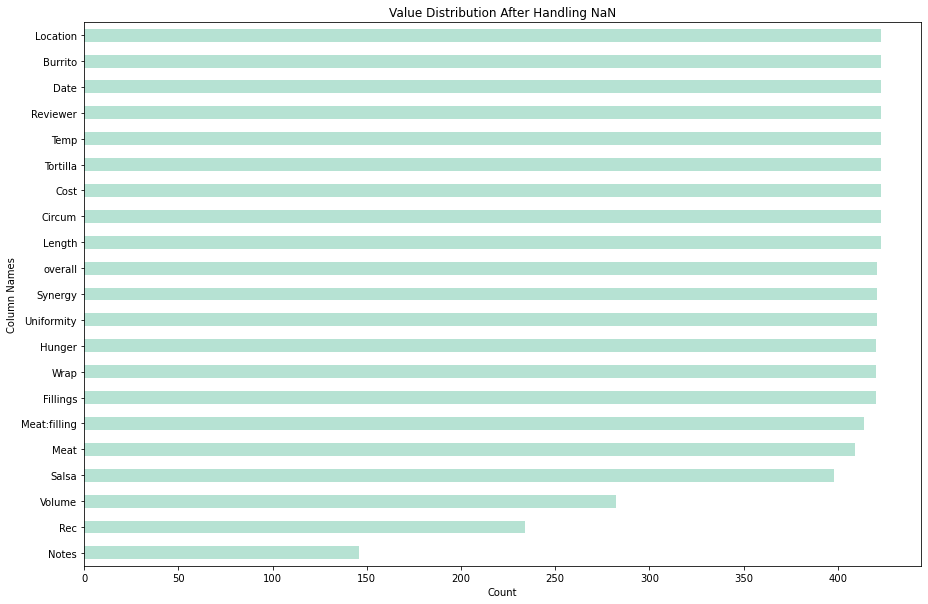

In [19]:
plt.figure(figsize=(15,10))
burrito_df.notnull().sum().sort_values().plot(kind="barh",title="Value Distribution Before Handling NaN", color="#B6E2D3")
plt.ylabel("Column Names")
plt.xlabel("Count");

plt.figure(figsize=(15,10))
burrito.notnull().sum().sort_values().plot(kind="barh",title="Value Distribution After Handling NaN", color="#B6E2D3")
plt.ylabel("Column Names")
plt.xlabel("Count");